In [77]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [78]:
pd.set_option("display.max_columns", None)
plt.style.use('seaborn-v0_8')
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["axes.titlesize"] = 25
plt.rcParams["axes.titleweight"] = 'bold'
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 15
plt.rcParams["legend.title_fontsize"] = 15

In [79]:
data_path = r"D:\RideWise-Predicting-Bike-sharing-Demand\Data\preprocessed_day.csv"
df = pd.read_csv(data_path, encoding= 'unicode_escape')

# Lasso

In [80]:
df.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,weekend,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,0,0,0,0.355170,0.828620,0.284606,985,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False
1,0,0,0,0.379232,0.715771,0.466215,801,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,0,0,1,0.171000,0.449638,0.465740,1349,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
3,0,0,1,0.175530,0.607131,0.284297,1562,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,0,0,1,0.209120,0.449313,0.339143,1600,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


In [81]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [82]:
# Creating a dependent variable for rented bike count
dependent_variable = 'cnt'

In [83]:
# Create a list of independent variables
independent_variables = list(set(df.columns.tolist()) - {dependent_variable})
independent_variables

['weekday_3',
 'mnth_9',
 'weekend',
 'workingday',
 'season_2',
 'mnth_10',
 'weekday_5',
 'weekday_1',
 'weekday_2',
 'mnth_2',
 'mnth_4',
 'mnth_7',
 'hum',
 'season_4',
 'mnth_3',
 'yr',
 'mnth_11',
 'weathersit_3',
 'weekday_4',
 'mnth_6',
 'windspeed',
 'mnth_5',
 'season_3',
 'temp',
 'mnth_8',
 'mnth_12',
 'holiday',
 'weekday_6',
 'weathersit_2']

In [84]:
# Create the dependent variable data
y = np.sqrt(df['cnt'])

# Create the data of independent variables
X = df.drop('cnt',axis=1)

In [85]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [86]:
X_train[0:10]

,yr,holiday,workingday,temp,hum,windspeed,weekend,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
97,0,0,1,0.344785,0.859897,0.421794,0,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False
503,1,0,1,0.629300,0.538132,0.235894,0,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
642,1,0,1,0.745598,0.743359,0.196166,0,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False
498,1,0,0,0.689526,0.592545,0.417929,1,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
303,0,0,1,0.349977,0.723222,0.173084,0,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False
570,1,0,1,0.861895,0.673522,0.389762,0,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False
250,0,0,1,0.716207,0.966134,0.351198,0,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True
17,0,0,1,0.196298,0.886033,0.256423,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False
595,1,0,0,0.771557,0.620394,0.320521,1,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False
240,0,0,1,0.719639,0.570265,0.283326,0,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False


In [87]:
SAVE_DIR="D:\RideWise-Predicting-Bike-sharing-Demand\Modeling\Saved_Models_files"
import joblib

num_cols = ['temp','hum', 'windspeed']

scaler = StandardScaler()

# Fit on train numeric columns
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

# Transform test numeric columns
X_test[num_cols] = scaler.transform(X_test[num_cols])

# Save scaler
with open(f"{SAVE_DIR}/scaler.pkl", "wb") as f:
     joblib.dump(scaler, f)

print("Scaler saved!")


Scaler saved!


In [88]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(584, 29)
(584,)
(147, 29)
(147,)


In [89]:
X_train[0:10]

,yr,holiday,workingday,temp,hum,windspeed,weekend,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
97,0,0,1,-0.845148,1.517365,0.490775,0,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False
503,1,0,1,0.394863,-0.716387,-0.689399,0,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
642,1,0,1,0.901725,0.708339,-0.941611,0,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False
498,1,0,0,0.657344,-0.338640,0.466236,1,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
303,0,0,1,-0.822519,0.568539,-1.088139,0,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False
570,1,0,1,1.408588,0.223515,0.287420,0,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False
250,0,0,1,0.773632,2.254877,0.042603,0,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True
17,0,0,1,-1.492302,1.698804,-0.559073,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False
595,1,0,0,1.014863,-0.145309,-0.152153,1,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False
240,0,0,1,0.788588,-0.493310,-0.388280,0,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False


In [90]:
lasso_reg = Lasso(alpha = 0.01)
lasso_reg.fit(X_train,y_train)

import joblib

joblib.dump(lasso_reg, "lasso_model.pkl")

print("[INFO] Lasso model saved successfully!")


[INFO] Lasso model saved successfully!


In [91]:
lasso_reg.coef_

array([ 14.18667514,  -2.15218541,   1.87945418,   8.42703596,
        -2.3679456 ,  -1.98117351,  -0.        ,   7.19137812,
         7.01827059,  13.26103553,   1.31205667,   4.35046583,
         2.04194435,   4.38483627,  -0.        ,  -3.58142433,
        -0.        ,   5.08284617,   1.94849104,  -0.23667125,
         0.        ,  -0.79651596,   0.        ,  -0.13621855,
         0.28181854,   0.74026214,   2.03484862,  -2.20842838,
       -18.45776199])

In [92]:
pd.DataFrame(lasso_reg.coef_,X.columns,columns=['Coeficients'])

,Coeficients
yr,14.186675
holiday,-2.152185
workingday,1.879454
temp,8.427036
hum,-2.367946
windspeed,-1.981174
weekend,-0.000000
season_2,7.191378
season_3,7.018271
season_4,13.261036


In [93]:
lasso_reg.intercept_

np.float64(49.64205469013278)

In [94]:
lasso_reg.score(X_train,y_train)

0.8395462198190426

In [95]:
y_pred_train = lasso_reg.predict(X_train)
y_pred = lasso_reg.predict(X_test)

In [96]:
MAE= mean_absolute_error(y_test,y_pred)
print(f" The Mean Absolute Error (MAE) is {MAE}.")

MSE=mean_squared_error(y_test,y_pred)
print(f" The Mean Squred Error(MSE) is {MSE}.")

RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

R2=r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")

adj_r2 = 1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print(f"Adjusted R2 is {adj_r2}.")

 The Mean Absolute Error (MAE) is 4.872529664556871.
 The Mean Squred Error(MSE) is 40.718951589487666.
The Root Mean Squared Error(RMSE) is 6.381140304795661.
The R2 Score is 0.8566517184157605.
Adjusted R2 is 0.8211209477666754.


In [97]:
test_dict = {'Model':"Lasso",
              'MAE':round(MAE,4),
              'MSE':round(MSE,4),
              'RMSE':round(RMSE,4),
              'R2_score':round(R2,4),
              'Adjusted_R2':round(adj_r2,4)}

In [98]:
test_results_df = pd.DataFrame(test_dict,index=[0])
test_results_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted_R2
0,Lasso,4.8725,40.719,6.3811,0.8567,0.8211


In [99]:
lasso_rg = Ridge()

alphas = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}

lasso_linear_reg = GridSearchCV(lasso_rg, alphas, scoring='neg_mean_squared_error', cv=4)
 
lasso_linear_reg.fit(X_train, y_train)

import joblib

joblib.dump(lasso_linear_reg, "lasso_model(CV).pkl")

print("[INFO] Lasso(CV) model saved successfully!")


[INFO] Lasso(CV) model saved successfully!


In [100]:
print(f'The best alpha value is {lasso_linear_reg.best_params_}')
print(f'The best negative mean squred error value is {lasso_linear_reg.best_score_}')

The best alpha value is {'alpha': 1}
The best negative mean squred error value is -45.55540761831442


In [101]:
def plot_Pred_vs_actual(y_pred_test,y_test):
  ''' 
  Visualize predicted values with actual values.
  '''
  plt.figure(figsize=(20,8))
  plt.plot(y_pred_test)
  plt.plot(np.array(y_test))
  plt.legend(["Predicted","Actual"],)
  plt.title("Predicted V/S Actual")
  plt.show()

In [102]:
def plot_scatter(y_pred_test,y_test):
  '''
  Plot scatter plot for y_test values and y_test values. To check how close we are to regresson line
  '''
  plt.figure(figsize=(16,5))
  sns.regplot(x = y_test,y = y_pred_test, line_kws={'color':'red'})
  plt.xlabel('Actual')
  plt.ylabel("Predicted")
  plt.title("Actual v/s Predicted")

In [103]:
def Residual_distPlot(y_pred_test,y_test):  
  '''
  Checks the distribution of residals
  '''        
                                                    
  plt.figure(figsize=(10,5))
  sns.distplot(x = y_test-y_pred_test)
  plt.title("Residual Distribution")

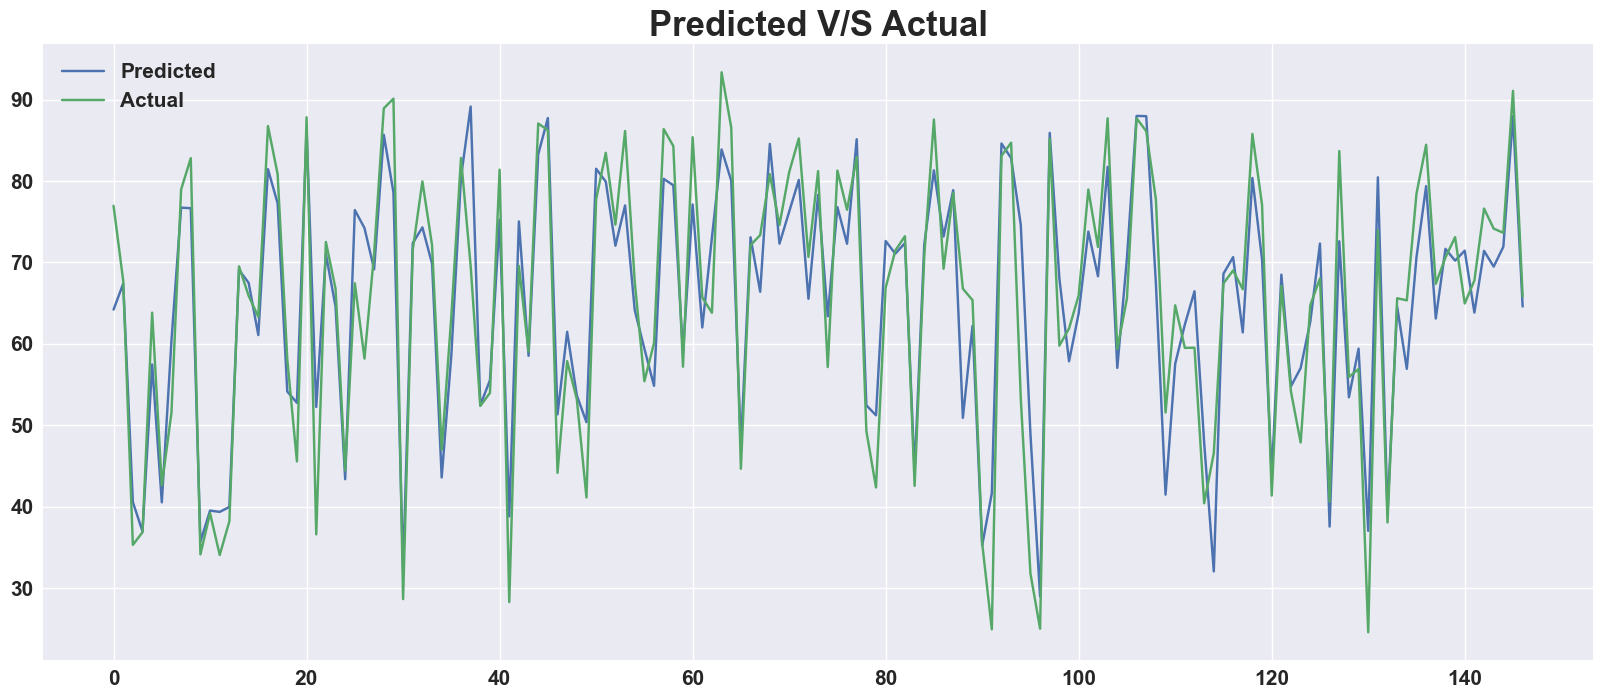

In [104]:
plot_Pred_vs_actual(y_pred,y_test)

Text(0.5, 0, 'y_predicted')

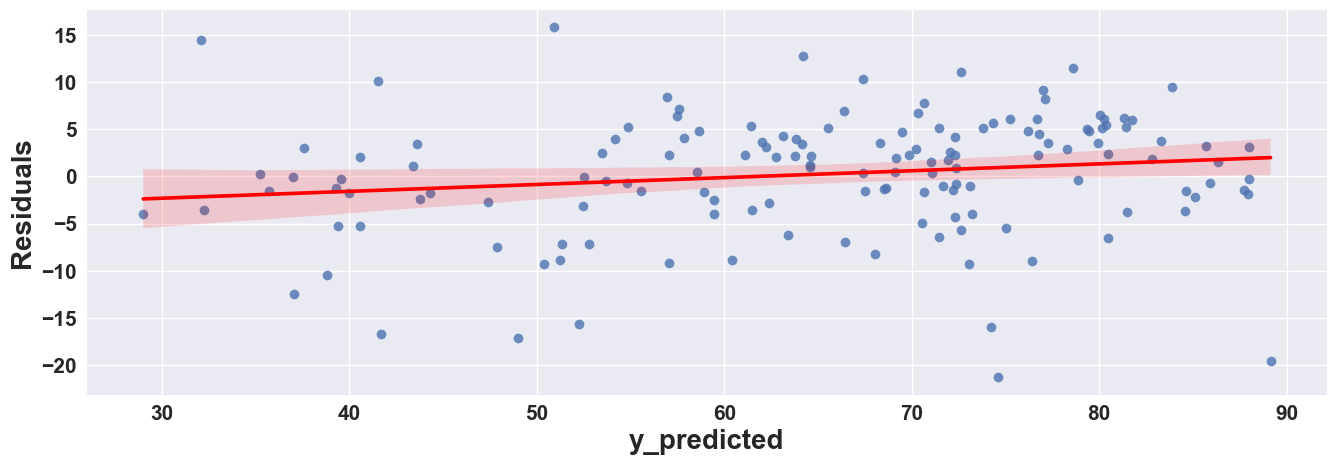

In [105]:
plt.figure(figsize=(16,5))
sns.regplot(x = y_pred,y = y_test-y_pred,line_kws={'color':'red'})
plt.ylabel('Residuals')
plt.xlabel('y_predicted')

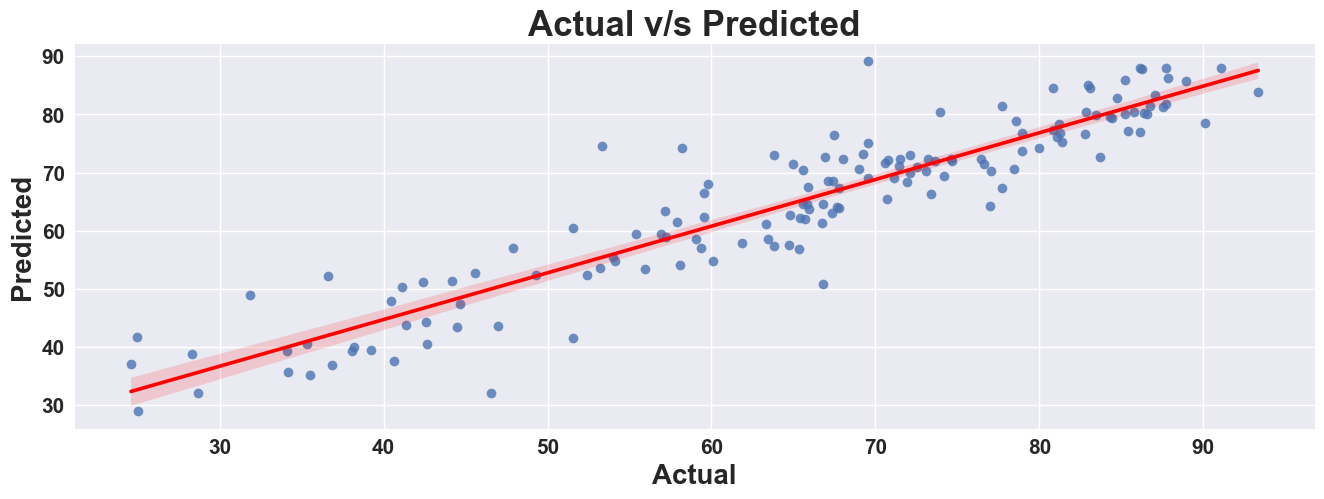

In [106]:
plot_scatter(y_pred,y_test)

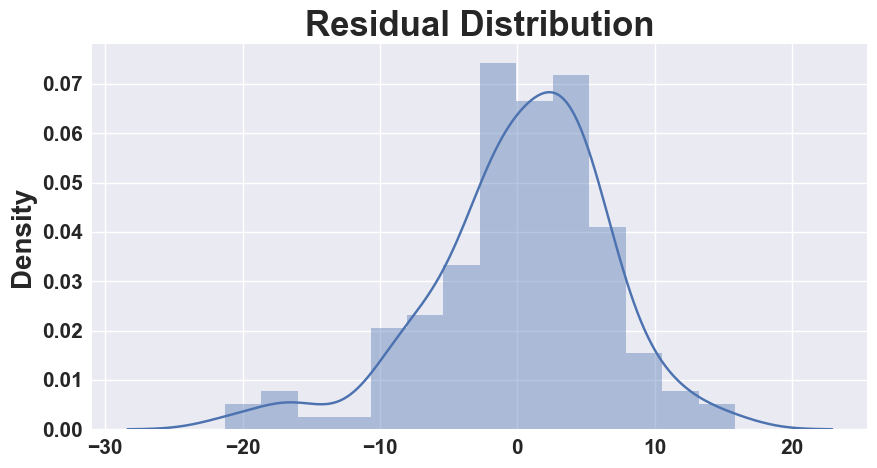

In [107]:
Residual_distPlot(y_pred,y_test)

# Ridge

In [108]:
# Initiating
ridge_reg = Ridge(alpha = 0.01)

In [109]:
# Fitting and training the model
ridge_reg.fit(X_train,y_train)

,alpha,0.01
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [110]:
import joblib

joblib.dump(ridge_reg, "ridge_model.pkl")

print("[INFO] Ridge model saved successfully!")

[INFO] Ridge model saved successfully!


In [111]:
# Check coefficient
ridge_reg.coef_

array([ 14.24632099,  -2.21422907,   2.12981071,   8.22270904,
        -2.31324437,  -1.97654816,   0.08441836,   7.29566313,
         7.83217708,  13.74811992,   1.96950534,   5.01761495,
         2.77495991,   5.19050032,   0.51371302,  -3.51917062,
         0.06662459,   5.31153227,   2.31377066,  -0.26279024,
         0.2430587 ,  -0.86589869,  -0.04298056,  -0.24258572,
         0.3058348 ,   0.76121181,   2.20985381,  -2.37201253,
       -19.04097771])

In [112]:
# get dataframe of x columns and Coeficients
pd.DataFrame(ridge_reg.coef_,X.columns,columns=['Coeficients'])

,Coeficients
yr,14.246321
holiday,-2.214229
workingday,2.129811
temp,8.222709
hum,-2.313244
windspeed,-1.976548
weekend,0.084418
season_2,7.295663
season_3,7.832177
season_4,13.748120


In [113]:
    # Check intercept
ridge_reg.intercept_

np.float64(48.77145129466829)

In [114]:
# Checking score
ridge_reg.score(X_train,y_train)

0.8397989209896929

In [115]:
# y predictions on training dataset
y_pred_train = ridge_reg.predict(X_train)
# y predictions on test dataset
y_pred = ridge_reg.predict(X_test)

In [116]:
# Evaluation of Test data set

#Calculate Mean Absolute Error.
MAE = mean_absolute_error(y_test,y_pred)
print(f" The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE = mean_squared_error(y_test,y_pred)
print(f" The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE = np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2 = r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")

#Calculate adjusted R2 Score
adj_r2 = 1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print(f"Adjusted R2 is {adj_r2}.")

 The Mean Absolute Error (MAE) is 4.854889093920252.
 The Mean Squred Error(MSE) is 40.175262711454984.
The Root Mean Squared Error(RMSE) is 6.338395909964523.
The R2 Score is 0.8585657378917082.
Adjusted R2 is 0.8235093823264051.


In [117]:
test_dict = {'Model':"Ridge(GridsearchCv Tunned)",
              'MAE':round(MAE,4),
              'MSE':round(MSE,4),
              'RMSE':round(RMSE,4),
              'R2_score':round(R2,4),
              'Adjusted_R2':round(adj_r2,4)}

In [118]:
import pandas as pd

test_results_df = pd.concat([test_results_df, pd.DataFrame([test_dict])], ignore_index=True)

test_results_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted_R2
0,Lasso,4.8725,40.7190,6.3811,0.8567,0.8211
1,Ridge(GridsearchCv Tunned),4.8549,40.1753,6.3384,0.8586,0.8235


In [119]:
# cross validation on Ridge regression
# creating object
ridge_rg = Ridge()

# alphas values's dictionary to pass on in Gridsearchcv 
alphas = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}

ridge_linear_reg = GridSearchCV(ridge_rg, alphas, scoring='neg_mean_squared_error', cv=4)
# fitting model
ridge_linear_reg.fit(X_train, y_train)

,estimator,Ridge()
,param_grid,"{'alpha': [1e-15, 1e-13, ...]}"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,4
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,alpha,1


In [120]:
import joblib

joblib.dump(ridge_linear_reg, "ridge_model(CV).pkl")

print("[INFO] Ridge(CV) saved successfully!")

[INFO] Ridge(CV) saved successfully!


In [121]:
# Since it showing best parameter alpha= 1.. alpha =1 means it will be as linear regression.
print(f'The best alpha value is {ridge_linear_reg.best_params_}')
print(f'The best negative mean squred error value is {ridge_linear_reg.best_score_}')

The best alpha value is {'alpha': 1}
The best negative mean squred error value is -45.55540761831442


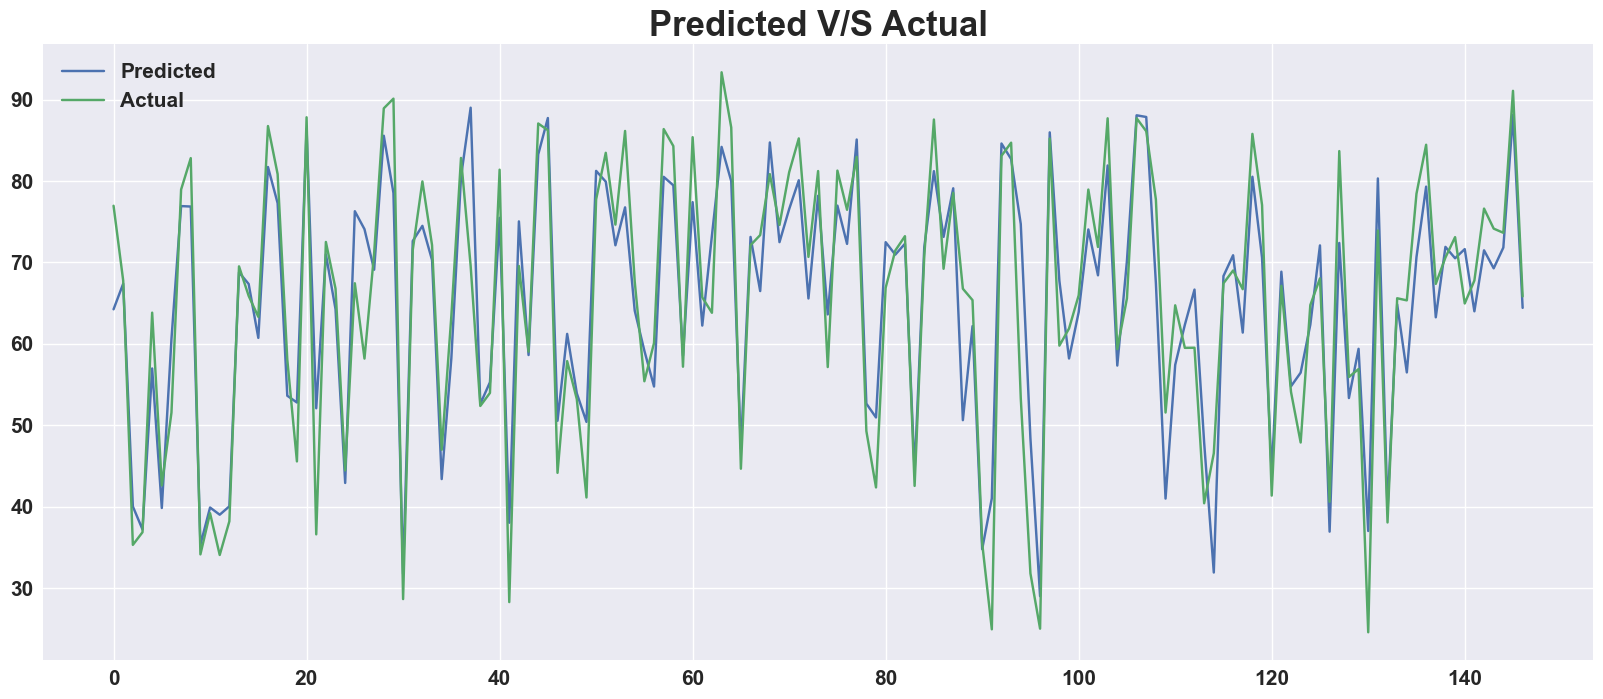

In [122]:
plot_Pred_vs_actual(y_pred,y_test)

Text(0.5, 0, 'y_predicted')

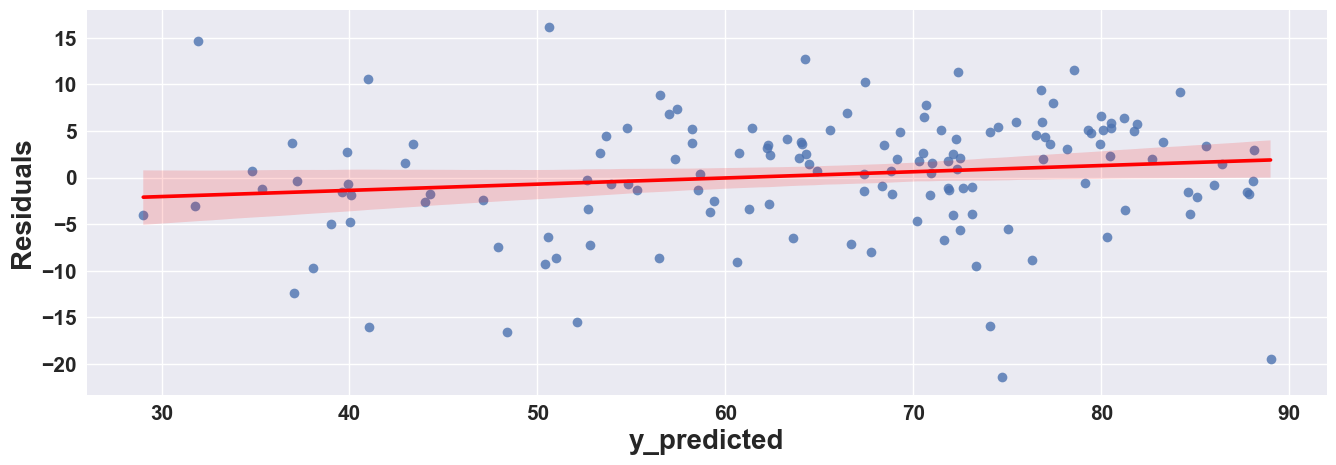

In [123]:
plt.figure(figsize=(16,5))
sns.regplot(x=y_pred,y=y_test-y_pred,line_kws={'color':'red'})
plt.ylabel('Residuals')
plt.xlabel('y_predicted')

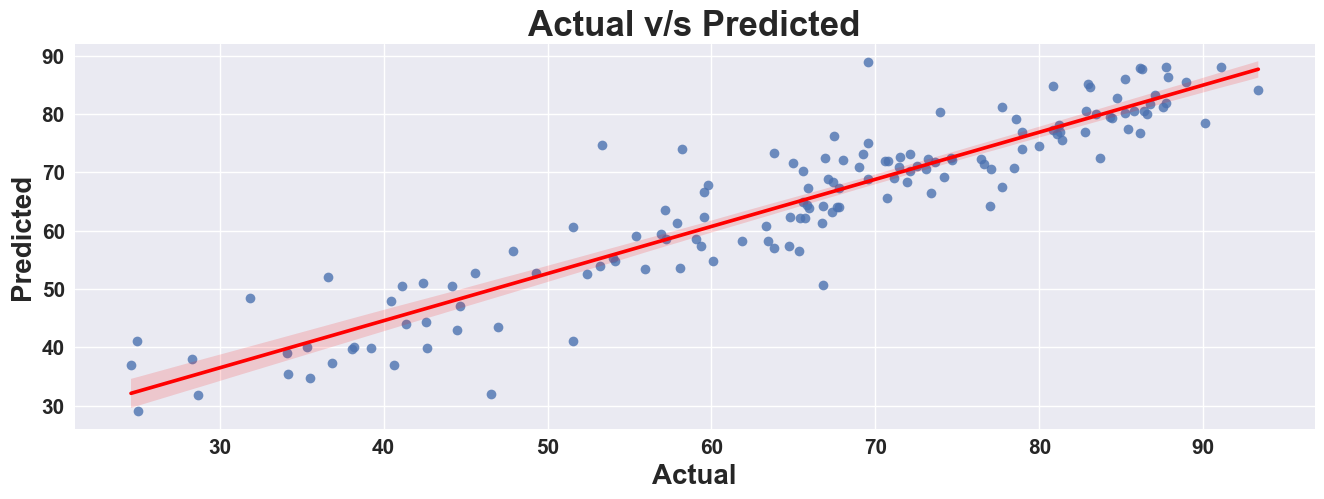

In [124]:
plot_scatter(y_pred,y_test)

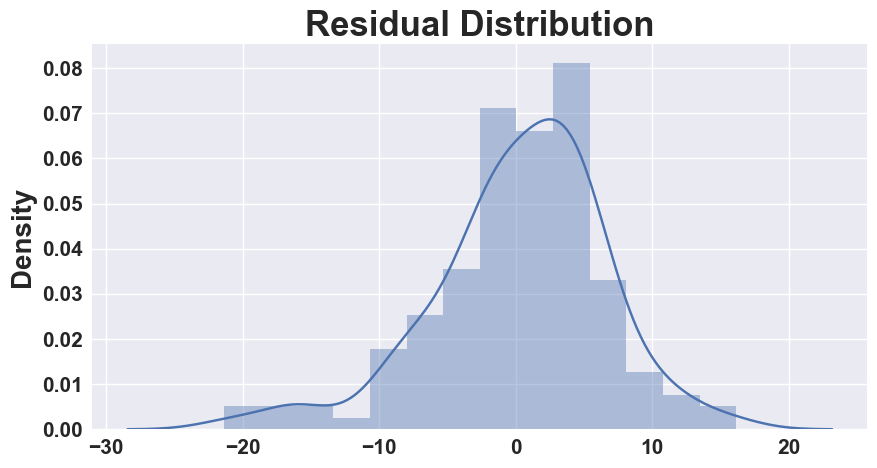

In [125]:
Residual_distPlot(y_pred,y_test)

# Elastic Net

In [126]:
elastic_net_reg = ElasticNet(alpha = 1e-05,l1_ratio = 0.3)
elastic_net_reg.fit(X_train,y_train)

,alpha,1e-05
,l1_ratio,0.3
,fit_intercept,True
,precompute,False
,max_iter,1000
,copy_X,True
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [127]:
elastic_net_reg.score(X_test,y_test)

0.8585846530190058

In [128]:
y_pred_train = elastic_net_reg.predict(X_train)
y_pred = elastic_net_reg.predict(X_test)

In [129]:
# check score on test data
elastic_net_reg.score(X_test,y_test)

0.8585846530190058

In [130]:
# Evaluation of Test data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_test,y_pred)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_test,y_pred)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")

#Calculate adjusted R2 Score
adj_r2 = 1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print(f"Adjusted R2 is {adj_r2}.")

The Mean Absolute Error (MAE) is 4.854530731082128.
The Mean Squred Error(MSE) is 40.16988975445662.
The Root Mean Squared Error(RMSE) is 6.337972053776872.
The R2 Score is 0.8585846530190058.
Adjusted R2 is 0.8235329858185884.


In [131]:
test_dict = {'Model':"ElasticNet(GridSearchCV-Tunned)",
              'MAE':round(MAE,4),
              'MSE':round(MSE,4),
              'RMSE':round(RMSE,4),
              'R2_score':round(R2,4),
              'Adjusted_R2':round(adj_r2,4)}

In [132]:
import pandas as pd

test_results_df = pd.concat([test_results_df, pd.DataFrame([test_dict])], ignore_index=True)

test_results_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted_R2
0,Lasso,4.8725,40.7190,6.3811,0.8567,0.8211
1,Ridge(GridsearchCv Tunned),4.8549,40.1753,6.3384,0.8586,0.8235
2,ElasticNet(GridSearchCV-Tunned),4.8545,40.1699,6.3380,0.8586,0.8235


In [133]:
elastic = ElasticNet()
alpha_l1 = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}
elastic_regressor = GridSearchCV(elastic, alpha_l1, scoring='neg_mean_squared_error',cv=4)
elastic_regressor.fit(X_train, y_train)

import joblib

joblib.dump(elastic_net_reg, "elastic_net_model.pkl")
joblib.dump(elastic_regressor, "elastic_net_model(CV).pkl")

print("[INFO] Elastic Net models saved successfully!")



[INFO] Elastic Net models saved successfully!


In [134]:
print(f'The best alpha value is {elastic_regressor.best_params_}')
print(f'The best negative mean squred error value is {elastic_regressor.best_score_}')

The best alpha value is {'alpha': 0.01, 'l1_ratio': 0.9}
The best negative mean squred error value is -45.39347194253379


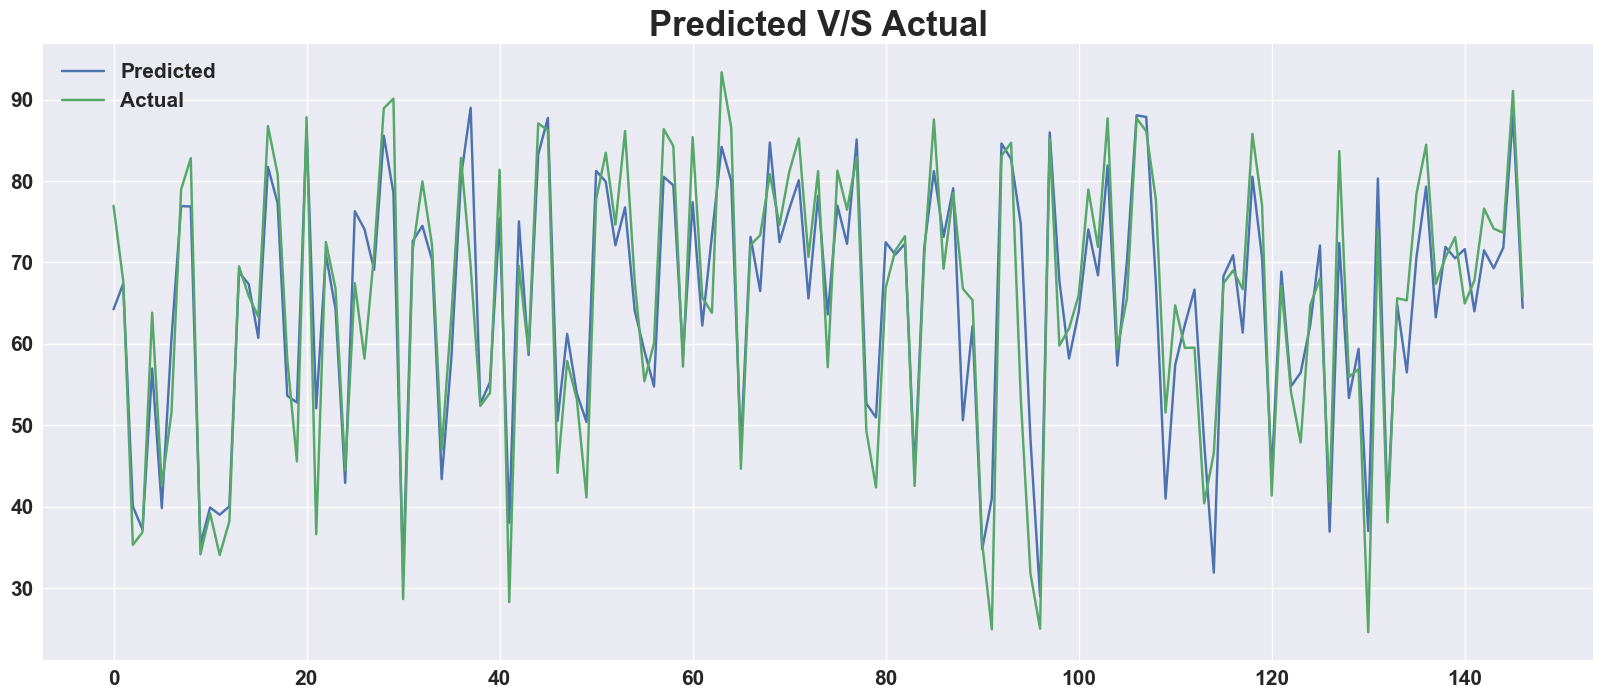

In [135]:
plot_Pred_vs_actual(y_pred,y_test)

Text(0.5, 0, 'y_predicted')

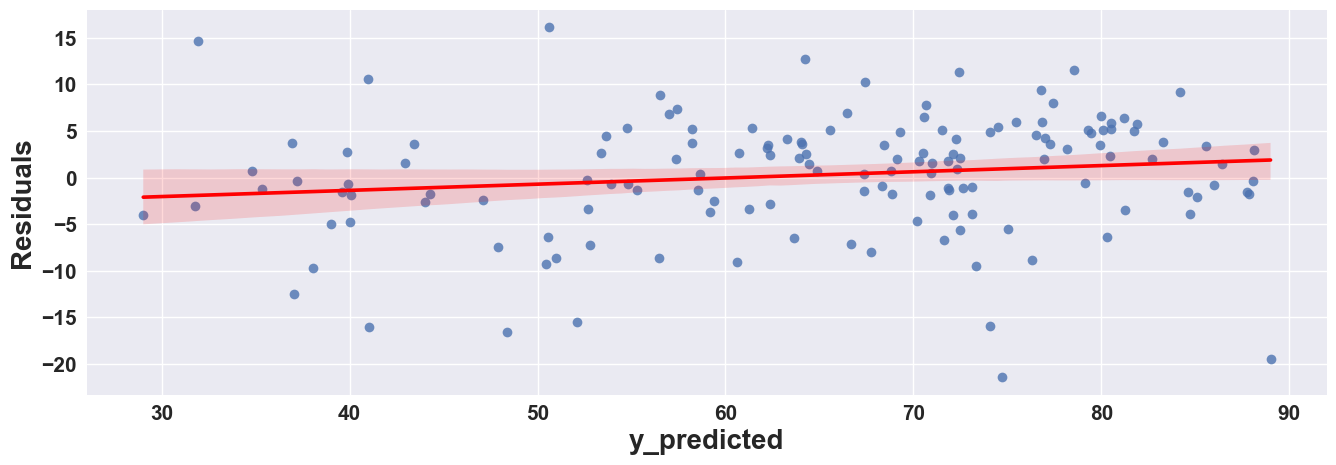

In [136]:
plt.figure(figsize=(16,5))
sns.regplot(x=y_pred,y=y_test-y_pred,line_kws={'color':'red'})
plt.ylabel('Residuals')
plt.xlabel('y_predicted')

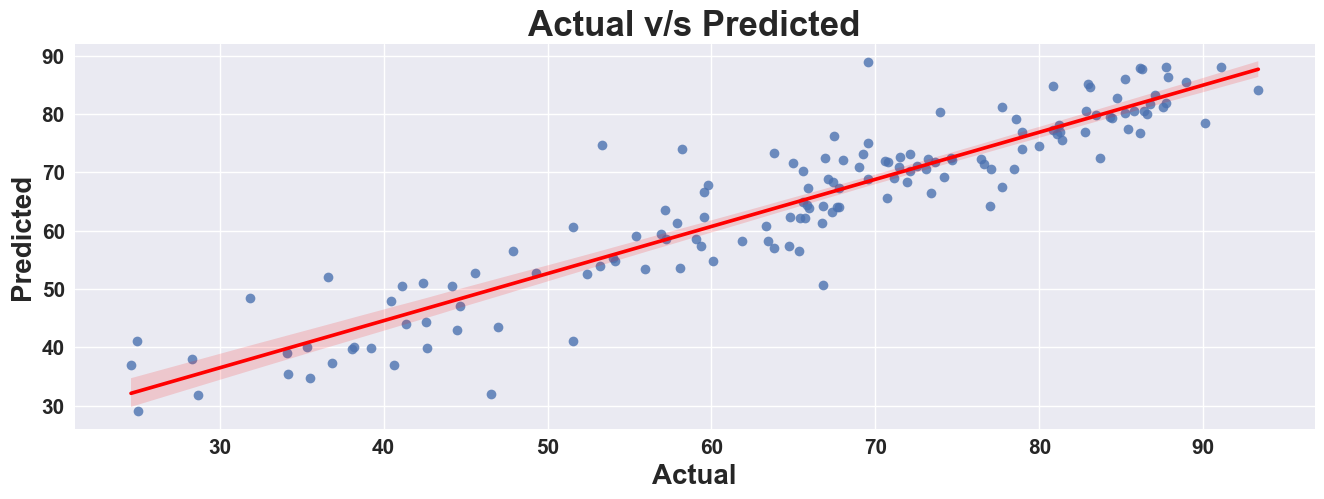

In [137]:
plot_scatter(y_pred,y_test)

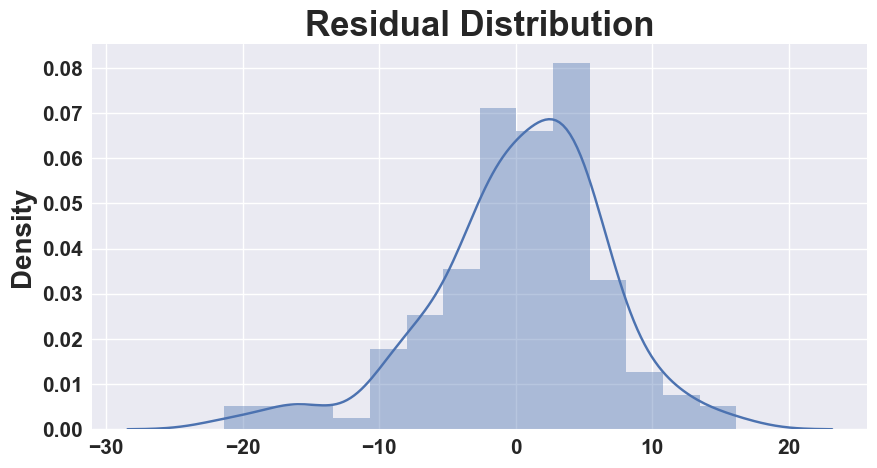

In [138]:
Residual_distPlot(y_pred,y_test)